## Problem Understanding, Formulation, and Significance

### Problem Description
In this analysis, we focus on understanding the impact of monthly and seasonal changes on stock market performance, particularly for the S&P 500 index. By examining historical data, we aim to identify patterns in stock performance across different months and seasons. This includes analyzing how monthly and seasonal variations affect the stock market, and identifying periods of significant positive and negative performance.

### Significance
Analyzing these trends is crucial for several reasons:
- **Investment Decisions**: Understanding when the market tends to perform better or worse can help investors make informed decisions about when to buy or sell stocks.
- **Strategic Planning**: Investors and financial analysts can use this information to adjust their strategies based on historical trends, potentially maximizing returns and minimizing risks.
- **Market Behavior Insights**: Recognizing seasonal and monthly patterns provides insights into market behavior, which can be useful for forecasting future performance.

### Objectives
The primary objectives of this analysis are:
1. **Identify Best and Worst Months**: Determine the top months with the highest positive and negative changes in stock performance. This helps in pinpointing when the market is most and least favorable.
2. **Understand Seasonal Trends**: Analyze seasonal performance trends to discern how different seasons impact stock performance. This involves evaluating average performance across seasons and understanding the implications for investment strategies.

### Note on File Paths
To ensure that you can run the notebook smoothly, you need to load the data from the correct file paths. The paths provided here are relative to the `data` directory. If you are using a different directory structure, adjust the paths accordingly.

- **Raw Data Files**:
  - Yahoo Finance Data: `data/raw/^SPX.csv`
  - Investing.com Data: `data/raw/S&P 500 Historical Data.csv`

- **Processed Data File**:
  - Merged and Cleaned Data: `data/processed/merged_cleaned_data.csv`

If you are running this Jupyter notebook on a different computer, make sure to update these paths to match your local directory structure. For instance:

```python
# Define file paths using raw strings
file_path_yahoo = r'path_to_your_directory\data\raw\^SPX.csv'
file_path_investing = r'path_to_your_directory\data\raw\S&P 500 Historical Data.csv'
processed_file_path = r'path_to_your_directory\data\processed\merged_cleaned_data.csv'


In [201]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Data Loading and Preparation

This section of the code focuses on:

1. **Loading Data**: Import stock market data from Yahoo Finance and Investing.com into separate DataFrames.
2. **Date Formatting**: Convert the 'Date' column in each dataset to a datetime format for accurate time-based analysis.
3. **Sorting**: Arrange both datasets chronologically by sorting them based on the 'Date' column.
4. **Initial Data Inspection**: Display the first five rows of each dataset to confirm correct data loading and sorting.


In [203]:

# Define file paths using raw strings
file_path_yahoo = r'C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\raw\^SPX.csv'
file_path_investing = r'C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\raw\S&P 500 Historical Data.csv'

# Load the datasets
df_yahoo = pd.read_csv(file_path_yahoo)  # Data from Yahoo Finance
df_investing = pd.read_csv(file_path_investing)  # Data from Investing.com

# Ensure the date column is in datetime format
# Assuming the date column is named 'Date' in both datasets. Adjust if needed.

df_yahoo['Date'] = pd.to_datetime(df_yahoo['Date'], errors='coerce')
df_investing['Date'] = pd.to_datetime(df_investing['Date'], errors='coerce')

# Sort datasets by date
df_yahoo_sorted = df_yahoo.sort_values(by='Date')
df_investing_sorted = df_investing.sort_values(by='Date')

# Display the first 5 rows from the earliest record
print("First 5 rows of Yahoo Finance dataset (sorted by earliest date):")
display(df_yahoo_sorted.head())

print("\nFirst 5 rows of Investing.com dataset (sorted by earliest date):")
display(df_investing_sorted.head())


First 5 rows of Yahoo Finance dataset (sorted by earliest date):


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-01,1111.920044,1155.380005,1105.079956,1131.130005,1131.130005,32820000000
1,2004-02-01,1131.130005,1158.979980,1124.439941,1144.939941,1144.939941,27985600000
2,2004-03-01,1144.939941,1163.229980,1087.160034,1126.209961,1126.209961,33597900000
3,2004-04-01,1126.209961,1150.569946,1107.229980,1107.300049,1107.300049,31611900000
4,2004-05-01,1107.300049,1127.739990,1076.319946,1120.680054,1120.680054,29326400000



First 5 rows of Investing.com dataset (sorted by earliest date):


,Date,Price,Open,High,Low,Vol.,Change %
240,2004-01-01,"1,131.10","1,111.90","1,155.40","1,105.10",NaN,1.73%
239,2004-02-01,"1,144.90","1,131.10","1,159.00","1,124.40",NaN,1.22%
238,2004-03-01,"1,126.20","1,144.90","1,163.20","1,087.10",NaN,-1.63%
237,2004-04-01,"1,107.30","1,126.20","1,150.60","1,107.20",NaN,-1.68%
236,2004-05-01,"1,120.70","1,107.30","1,127.70","1,076.30",NaN,1.21%


### Data Merging and Inspection

In this section, we:

1. **Load Datasets**: Import data from Yahoo Finance and Investing.com into two separate DataFrames.
2. **Date Conversion**: Convert the 'Date' columns in both datasets to datetime format for consistent time-based operations.
3. **Sorting**: Sort both datasets by date to ensure chronological order.
4. **Merge Data**: Combine the two datasets on the 'Date' column to create a unified DataFrame, aligning data from both sources.
5. **Initial Inspection**: Display the first few rows and column names of the merged dataset to verify successful merging and check the available data.


In [193]:
import pandas as pd

# Define file paths using raw strings
file_path_yahoo = r'C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\raw\^SPX.csv'
file_path_investing = r'C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\raw\S&P 500 Historical Data.csv'

# Load the datasets
df_yahoo = pd.read_csv(file_path_yahoo)  # Data from Yahoo Finance
df_investing = pd.read_csv(file_path_investing)  # Data from Investing.com

# Ensure the date column is in datetime format
df_yahoo['Date'] = pd.to_datetime(df_yahoo['Date'], errors='coerce')
df_investing['Date'] = pd.to_datetime(df_investing['Date'], errors='coerce')

# Sort datasets by date
df_yahoo_sorted = df_yahoo.sort_values(by='Date')
df_investing_sorted = df_investing.sort_values(by='Date')

# Merge the datasets on the 'Date' column
merged_df = pd.merge(df_yahoo_sorted, df_investing_sorted, on='Date', how='inner')

# Display the first few rows of the merged dataset
print("First few rows of the merged dataset:")
display(merged_df.head())

# Display the column names of the merged dataset
print("\nColumn names in the merged dataset:")
print(merged_df.columns.tolist())


First few rows of the merged dataset:


,Date,Open_x,High_x,Low_x,Close,Adj Close,Volume,Price,Open_y,High_y,Low_y,Vol.,Change %
0,2004-01-01,1111.920044,1155.380005,1105.079956,1131.130005,1131.130005,32820000000,"1,131.10","1,111.90","1,155.40","1,105.10",NaN,1.73%
1,2004-02-01,1131.130005,1158.979980,1124.439941,1144.939941,1144.939941,27985600000,"1,144.90","1,131.10","1,159.00","1,124.40",NaN,1.22%
2,2004-03-01,1144.939941,1163.229980,1087.160034,1126.209961,1126.209961,33597900000,"1,126.20","1,144.90","1,163.20","1,087.10",NaN,-1.63%
3,2004-04-01,1126.209961,1150.569946,1107.229980,1107.300049,1107.300049,31611900000,"1,107.30","1,126.20","1,150.60","1,107.20",NaN,-1.68%
4,2004-05-01,1107.300049,1127.739990,1076.319946,1120.680054,1120.680054,29326400000,"1,120.70","1,107.30","1,127.70","1,076.30",NaN,1.21%



Column names in the merged dataset:
['Date', 'Open_x', 'High_x', 'Low_x', 'Close', 'Adj Close', 'Volume', 'Price', 'Open_y', 'High_y', 'Low_y', 'Vol.', 'Change %']


In [204]:
# Merge the datasets on the 'Date' column
merged_df = pd.merge(df_yahoo_sorted, df_investing_sorted, on='Date', how='inner')

# Display the first few rows of the merged dataset
print("\nFirst few rows of the merged dataset:")
print(merged_df.head())

# Display the column names of the merged dataset
print("\nColumn names in the merged dataset:")
print(merged_df.columns.tolist())



First few rows of the merged dataset:
        Date       Open_x       High_x        Low_x        Close    Adj Close  \
0 2004-01-01  1111.920044  1155.380005  1105.079956  1131.130005  1131.130005   
1 2004-02-01  1131.130005  1158.979980  1124.439941  1144.939941  1144.939941   
2 2004-03-01  1144.939941  1163.229980  1087.160034  1126.209961  1126.209961   
3 2004-04-01  1126.209961  1150.569946  1107.229980  1107.300049  1107.300049   
4 2004-05-01  1107.300049  1127.739990  1076.319946  1120.680054  1120.680054   

        Volume     Price    Open_y    High_y     Low_y  Vol. Change %  
0  32820000000  1,131.10  1,111.90  1,155.40  1,105.10   NaN    1.73%  
1  27985600000  1,144.90  1,131.10  1,159.00  1,124.40   NaN    1.22%  
2  33597900000  1,126.20  1,144.90  1,163.20  1,087.10   NaN   -1.63%  
3  31611900000  1,107.30  1,126.20  1,150.60  1,107.20   NaN   -1.68%  
4  29326400000  1,120.70  1,107.30  1,127.70  1,076.30   NaN    1.21%  

Column names in the merged dataset:
['Dat

### Column Name Resolution and Cleanup

In this section, we:

1. **Resolve Column Name Conflicts**: Handle columns with suffixes `_x` and `_y` by keeping the `_y` columns and merging their values into the columns without suffixes. We then drop the `_x` columns.

2. **Remove Columns with All NaN Values**: Eliminate columns that contain only NaN values to clean up the dataset.

3. **Clean Column Names**: Remove the `_y` suffix from remaining column names and drop any specified columns (e.g., 'Adj Close').

4. **Verify Changes**: Display the column names and first few rows of the cleaned dataset to ensure that the changes have been applied correctly.


In [206]:
# Resolve column name conflicts
# For columns with suffixes '_x' and '_y', we keep the '_y' columns and rename them to remove the suffix
for col in merged_df.columns:
    if col.endswith('_x'):
        new_col = col.replace('_x', '')
        if new_col in merged_df.columns:
            # Combine values from the '_y' column and '_x' column
            merged_df[new_col] = merged_df[new_col].combine_first(merged_df[col])
        # Drop the '_x' column
        merged_df.drop(columns=[col], inplace=True)

# Remove columns with all NaN values
merged_df = merged_df.dropna(axis=1, how='all')

# Define a function to remove '_y' suffix from column names and drop specified columns
def remove_suffix_y_and_drop_columns(df, columns_to_drop):
    # Rename columns by removing the '_y' suffix
    df.columns = [col.replace('_y', '') for col in df.columns]
    
    # Drop specified columns
    df = df.drop(columns=columns_to_drop, errors='ignore')
    
    return df

# Specify columns to drop
columns_to_drop = ['Adj Close']

# Apply the function to the DataFrame
merged_df = remove_suffix_y_and_drop_columns(merged_df, columns_to_drop)

# Display the column names of the cleaned merged dataset after renaming and dropping columns
print("\nColumn names in the cleaned merged dataset after renaming and dropping:")
print(merged_df.columns.tolist())

# Display the first few rows to verify the changes
print("\nFirst few rows of the cleaned merged dataset:")
print(merged_df.head())



Column names in the cleaned merged dataset after renaming and dropping:
['Date', 'Close', 'Volume', 'Price', 'Open', 'High', 'Low', 'Change %']

First few rows of the cleaned merged dataset:
        Date        Close       Volume     Price      Open      High  \
0 2004-01-01  1131.130005  32820000000  1,131.10  1,111.90  1,155.40   
1 2004-02-01  1144.939941  27985600000  1,144.90  1,131.10  1,159.00   
2 2004-03-01  1126.209961  33597900000  1,126.20  1,144.90  1,163.20   
3 2004-04-01  1107.300049  31611900000  1,107.30  1,126.20  1,150.60   
4 2004-05-01  1120.680054  29326400000  1,120.70  1,107.30  1,127.70   

        Low Change %  
0  1,105.10    1.73%  
1  1,124.40    1.22%  
2  1,087.10   -1.63%  
3  1,107.20   -1.68%  
4  1,076.30    1.21%  


### Saving the Processed Data

In this section, we:

1. **Define File Path**: Specify the path for saving the cleaned dataset by combining the directory path and filename.

2. **Create Directory**: Ensure that the directory for saving the file exists, creating it if necessary.

3. **Save Data**: Write the cleaned DataFrame to a CSV file in the specified directory.

4. **Verify Save Operation**: Print the file path and column names of the saved dataset, and display the first few rows to confirm that the data was saved correctly.


In [210]:


# Define the path to the directory and file
processed_dir = r'C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\processed'
processed_file_path = os.path.join(processed_dir, 'merged_cleaned_data.csv')

# Create the directory if it doesn't exist
os.makedirs(processed_dir, exist_ok=True)

# Save the cleaned DataFrame to a CSV file
merged_df.to_csv(processed_file_path, index=False)

# Print the column names to verify
print(f"Processed data saved to {processed_file_path}")
print("\nColumn names in the saved dataset:")
print(merged_df.columns.tolist())

# Display the first few rows to verify the saved data
print("\nFirst few rows of the saved dataset:")
print(merged_df.head())


Processed data saved to C:\Users\Martin\DataspellProjects\S&P_500_Seasonality_Analysis\data\processed\merged_cleaned_data.csv

Column names in the saved dataset:
['Date', 'Close', 'Volume', 'Price', 'Open', 'High', 'Low', 'Change %', 'Month', 'Season']

First few rows of the saved dataset:
        Date        Close       Volume     Price      Open      High  \
0 2004-01-01  1131.130005  32820000000  1,131.10  1,111.90  1,155.40   
1 2004-02-01  1144.939941  27985600000  1,144.90  1,131.10  1,159.00   
2 2004-03-01  1126.209961  33597900000  1,126.20  1,144.90  1,163.20   
3 2004-04-01  1107.300049  31611900000  1,107.30  1,126.20  1,150.60   
4 2004-05-01  1120.680054  29326400000  1,120.70  1,107.30  1,127.70   

        Low  Change %     Month  Season  
0  1,105.10      1.73   January  Winter  
1  1,124.40      1.22  February  Winter  
2  1,087.10     -1.63     March  Spring  
3  1,107.20     -1.68     April  Spring  
4  1,076.30      1.21       May  Spring  


### Adding Month Information

In this section, we:

1. **Convert 'Date' Column**: Ensure the 'Date' column is in datetime format, which is essential for extracting date-related information.

2. **Extract Month Names**: Create a new column, 'Month', that contains the full month names extracted from the 'Date' column.

3. **Verify Changes**: Display the first few rows of the dataset to confirm the addition of the 'Month' column and list the updated column names.


In [212]:


# Ensure the 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract the month name from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.strftime('%B')

# Display the first few rows to verify the changes
print("\nFirst few rows with the new 'Month' column:")
print(merged_df[['Date', 'Month']].head())

# Display the column names to verify the addition
print("\nColumn names after adding 'Month' column:")
print(merged_df.columns.tolist())



First few rows with the new 'Month' column:
        Date     Month
0 2004-01-01   January
1 2004-02-01  February
2 2004-03-01     March
3 2004-04-01     April
4 2004-05-01       May

Column names after adding 'Month' column:
['Date', 'Close', 'Volume', 'Price', 'Open', 'High', 'Low', 'Change %', 'Month', 'Season']


### Monthly Change Analysis

In this section, we:

1. **Convert 'Date' Column**: Ensure the 'Date' column is correctly formatted as datetime.

2. **Process 'Change %' Values**: Convert the 'Change %' column to numeric values by removing the '%' sign and changing the datatype to float.

3. **Extract and Use Month Names**: Extract month names from the 'Date' column and group data by month to calculate the average percentage change.

4. **Reorder and Plot Data**: Reorder months to match the calendar year, and plot a bar chart showing the average monthly change. The plot includes annotations for each bar to display the exact average change percentage.


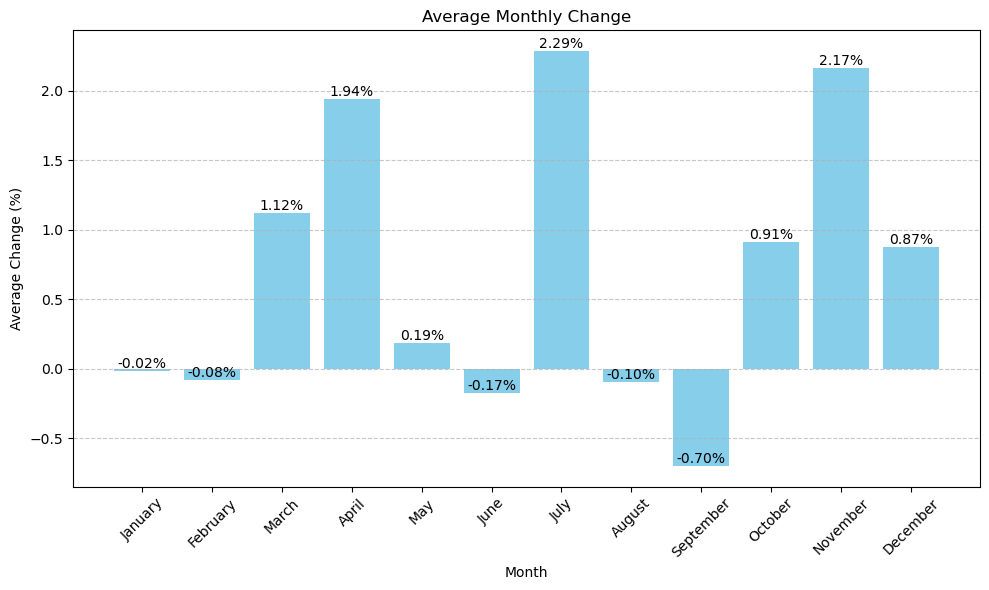

In [214]:
# Ensure the 'Date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Convert 'Change %' to numeric values
merged_df['Change %'] = merged_df['Change %'].replace({'%': ''}, regex=True).astype(float)

# Extract month names
merged_df['Month'] = merged_df['Date'].dt.strftime('%B')

# Group by month and calculate the average change
monthly_avg_change = merged_df.groupby('Month')['Change %'].mean()

# Reorder months to match calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_change = monthly_avg_change.reindex(month_order)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_change.index, monthly_avg_change.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Change (%)')
plt.title('Average Monthly Change')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, value in enumerate(monthly_avg_change.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Seasonal Change Analysis

In this section, we:

1. **Ensure Numeric Values**: Confirm that the 'Change %' column is numeric by removing any '%' signs and converting the column to float.

2. **Determine Seasons**: Define seasons based on month names and create a new 'Season' column using a function that categorizes months into Winter, Spring, Summer, or Fall.

3. **Calculate Average Seasonal Change**: Group the data by season and compute the average percentage change for each season.

4. **Plot Seasonal Data**: Create a bar chart to visualize the average change across different seasons. The plot is color-coded by season and includes annotations for each bar to show the exact average change percentage.


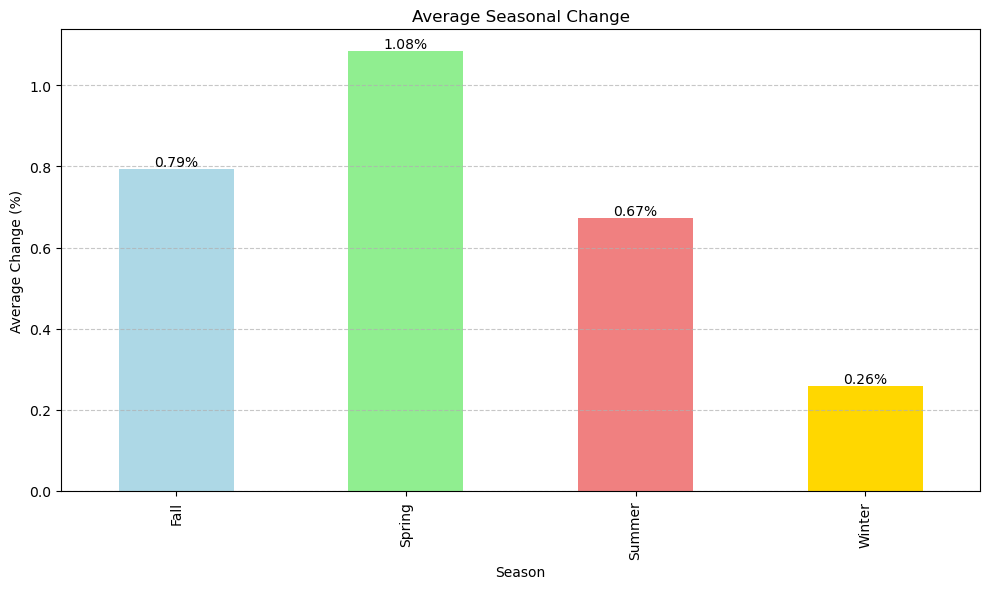

In [215]:



# Sample data preparation (assuming 'merged_df' is already loaded and cleaned)
# Ensure the 'Change %' column is numeric
merged_df['Change %'] = merged_df['Change %'].replace({'%': ''}, regex=True).astype(float)

# Extract month names
merged_df['Month'] = merged_df['Date'].dt.strftime('%B')

# Define seasons
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'

# Apply the function to create a 'Season' column
merged_df['Season'] = merged_df['Month'].apply(get_season)

# Group by season and calculate the average change
seasonal_avg_change = merged_df.groupby('Season')['Change %'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
seasonal_avg_change.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.xlabel('Season')
plt.ylabel('Average Change (%)')
plt.title('Average Seasonal Change')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for i, value in enumerate(seasonal_avg_change):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Monthly Change Classification

In this section, we:

1. **Check for 'Change %' Column**: Verify that the 'Change %' column exists in the dataset.

2. **Classify Changes**: Extract month names and categorize changes as 'Positive' or 'Negative' based on the values in the 'Change %' column.

3. **Count Positive and Negative Changes**: Group the data by month and change type, count occurrences, and reorder the months to match the calendar year.

4. **Visualize Results**: Create a bar chart to display the counts of positive and negative changes for each month. The chart uses different colors to differentiate between positive and negative changes.

5. **Identify Best and Worst Months**: Determine and display the top 3 months with the highest positive changes and the top 3 months with the highest negative changes.

The results are visualized and printed to help identify trends in monthly performance.


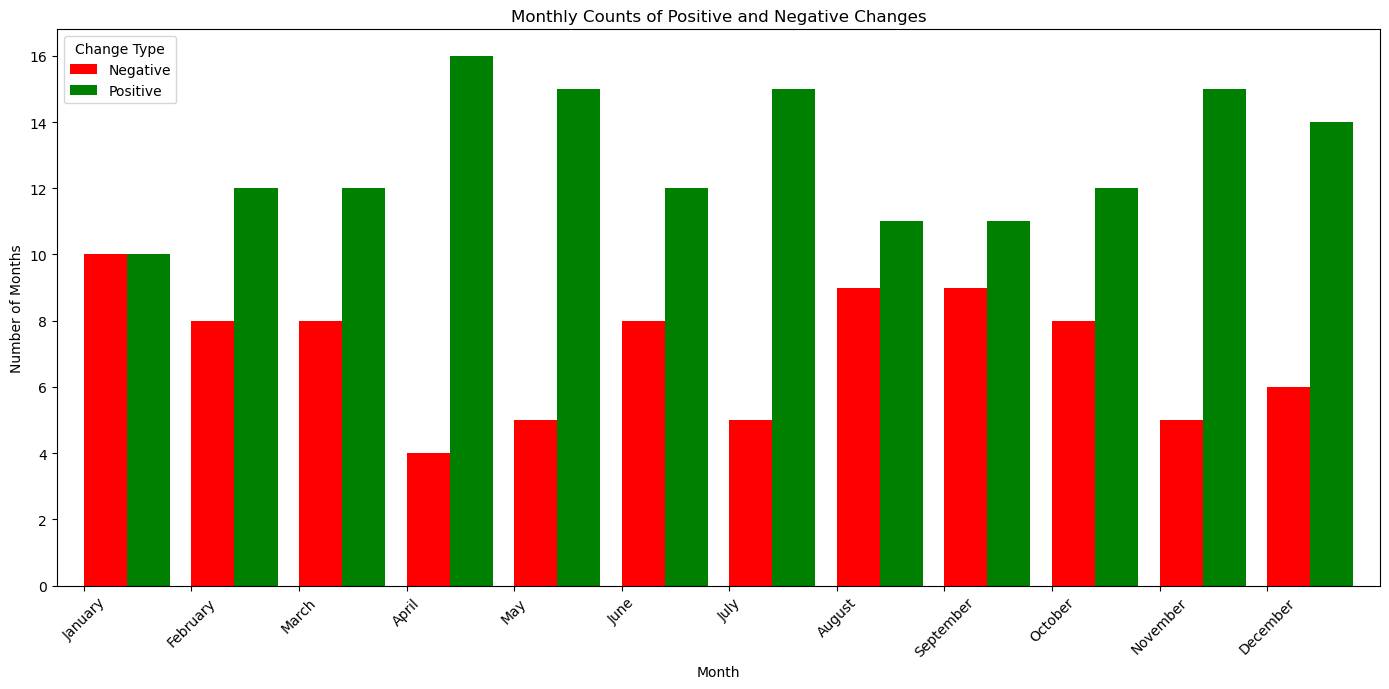


Top 3 Best Months (Highest Positive Counts):
Month
April    16
May      15
July     15
Name: Positive, dtype: int64

Top 3 Worst Months (Highest Negative Counts):
Month
January      10
August        9
September     9
Name: Negative, dtype: int64


In [217]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Change %' column is present
if 'Change %' in merged_df.columns:
    # Extract month names and classify changes
    merged_df['Month'] = merged_df['Date'].dt.month_name()
    merged_df['Change Type'] = merged_df['Change %'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
    
    # Define the correct order of months
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Count the number of positive and negative months for each month of the year
    monthly_counts = merged_df.groupby(['Month', 'Change Type']).size().unstack(fill_value=0)
    
    # Reorder the DataFrame by the correct month order
    monthly_counts = monthly_counts.reindex(month_order, fill_value=0)
    
    # Plot positive and negative month counts by month
    fig, ax = plt.subplots(figsize=(14, 7))
    monthly_counts.plot(kind='bar', ax=ax, color=['red', 'green'], width=0.8, position=0)
    ax.set_title('Monthly Counts of Positive and Negative Changes')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Months')
    ax.set_xticklabels(monthly_counts.index, rotation=45)
    ax.legend(title='Change Type', loc='upper left')
    plt.tight_layout()
    plt.show()

    # Identify the best and worst months based on the counts
    # Top 3 months with the highest positive counts
    best_months = monthly_counts['Positive'].nlargest(3)
    
    # Top 3 months with the highest negative counts
    worst_months = monthly_counts['Negative'].nlargest(3)

    # Print best and worst months
    print("\nTop 3 Best Months (Highest Positive Counts):")
    print(best_months)
    
    print("\nTop 3 Worst Months (Highest Negative Counts):")
    print(worst_months)
    
    
    
else:
    print("The 'Change %' column is not present in the DataFrame.")


## Data Source and Conclusion

### Data Source

The analysis utilizes historical stock performance data from the following sources:

- **Yahoo Finance:** Provides comprehensive historical performance data for the S&P 500 index.
- **Investing.com:** Offers supplementary historical data to support and enhance the Yahoo Finance dataset.

The datasets were merged and cleaned to ensure consistency and accuracy, enabling a thorough examination of seasonal trends in the S&P 500's performance.

### Conclusion and Implications for Investors

The analysis reveals key seasonal trends in the S&P 500 index:

#### Top 3 Best Months for Positive Returns:
- **April**: 16 occurrences
- **May**: 15 occurrences
- **July**: 15 occurrences

These months exhibit the highest frequency of positive changes, suggesting they are typically favorable for performance. Investors may consider these months as optimal periods for potentially achieving positive returns based on historical data.

#### Top 3 Worst Months for Negative Returns:
- **January**: 10 occurrences
- **August**: 9 occurrences
- **September**: 9 occurrences

These months show the highest frequency of negative changes, indicating they are generally less favorable for performance. Investors should approach these months with caution as they have historically experienced more frequent declines.

### Seasonal Analysis

The analysis also breaks down the data by season:

- **Spring (March, April, May)**
- **Summer (June, July, August)**
- **Fall (September, October, November)**
- **Winter (December, January, February)**

#### Best and Worst Seasons:
- **Spring**: Typically shows stronger performance with positive changes concentrated in April and May.
- **Summer**: Consistent performance with notable positive trends in July.
- **Fall**: Less favorable, as it includes September and October, which have high negative change counts.
- **Winter**: Generally weaker, particularly with January showing high negative counts.

**Why Spring is Better:**

Spring is observed as a particularly strong season due to consistently positive performance in April and May, which historically have shown high frequencies of positive changes. The period often benefits from market optimism and favorable economic conditions following the winter months.

**Why Winter is Weaker:**

Winter, especially January, tends to show weaker performance. This may be attributed to market adjustments and corrections after the year-end and holiday period, leading to increased volatility and negative returns.

By understanding these seasonal patterns, investors can strategically time their investments to capitalize on historically strong periods and manage risk during weaker months, thus optimizing their investment strategies and enhancing portfolio management.
